In [64]:
import numpy as np

def Hill_X_prod(x,t,Kxy,nXY):
    return x**nXY/(Kxy**nXY+x**nXY)

    
def Y_t(y,t,x,alphay,betaY,Kxy,nXY):
    return betaY*Hill_X_prod(x,t,Kxy,nXY)-alphay*y
def z_t(z,t,x,y,alphaZ,betaZ,alphay,betaY,Kxy,nXY):
    return betaZ*Hill_X_prod(x,t,Kxy,nXY)*Y_t(y,t,x,alphay,betaY,Kxy,nXY)-alphaZ*z


def rate_FFL_pulse(u,t,x0,x1,D,alphaY,betaY,alphaZ,betaZ,Kxy,nXY,Kxz,nXZ,Kyz,nYZ):
    y,z = u
    x = x0
    if t>=D:
        x = x1 # value of x after step
    dydt = Y_t(y,t,x,alphay,betaY,Kxy,nXY)
    dzdt = z_t(z,t,x,y,alphaZ,betaZ,alphay,betaY,Kxz,nXZ)
    return [dydt,dzdt]


alphay = 1.
betaY = 1.
Kxy = .5
nXY = 20

alphaZ = 1.
betaZ = 1.
Kxz = 0.75
nXZ = 20
Kyz = 0.5
nYZ = 20

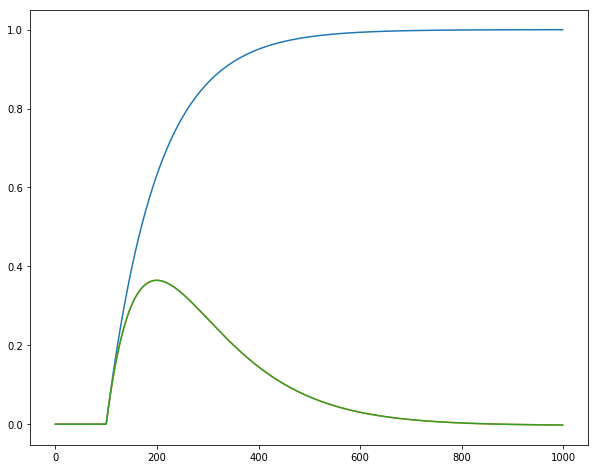

In [68]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
t = np.linspace(0,10,1000)
x0 = 0.0
x1= 1.0
D = 1.0
y0 = 0.0
z0 = 0.0
u0 = [y0,z0]
ffl = odeint(rate_FFL_pulse,u0,t,args=(x0,x1,D,alphay,betaY,alphaZ,betaZ,Kxy,nXY,Kxz,nXZ,Kyz,nYZ))
yt = ffl[:,0]
zt = ffl[:,1]
plt.figure(figsize=(10,8))
plt.plot(yt)
plt.plot(zt)
plt.plot(zt)


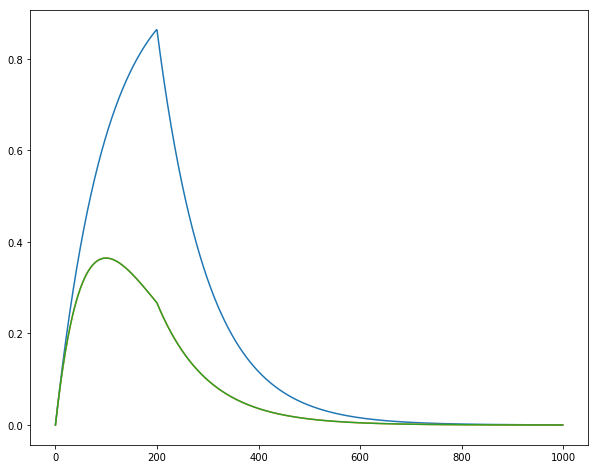

In [70]:
t = np.linspace(0,10,1000)
x0 = 1.0
x1= 0.0
D = 2.0
y0 = 0.0
z0 = 0.0
u0 = [y0,z0]
ffl = odeint(rate_FFL_pulse,u0,t,args=(x0,x1,D,alphay,betaY,alphaZ,betaZ,Kxy,nXY,Kxz,nXZ,Kyz,nYZ))
yt = ffl[:,0]
zt = ffl[:,1]
plt.figure(figsize=(10,8))
plt.plot(yt)
plt.plot(zt)
plt.plot(zt)


In [79]:
def rate_FFL_pulse2(u,t,ax,ay,az,Bx,By,Bz,Bz_,Trep,D):
    Y,Z = u
    if t<D:
        dydt = By - (ay*Y)
    else:
        dydt = -(ay*Y)
    if t<Trep:
        dzdt = Bz - (az*Z)
    elif (t>Trep) and (t<D):
        dzdt = Bz_ - (az*Z)
    else:
        dzdt = -(az*Z)
    return [dydt,dzdt] 

In [80]:
import math
Bx = 1
ax = 1
By = 1
ay = 1
Bz = 1
Bz_ = 0.5 # B'
az = 1
Kyz = 0.75
Kxy = 0.5
n = 20
Yst = By/ay
Xst = Bx/ax
Zm = Bz/az
Zst = Bz_/az
Trep = (1/ay)*math.log(1/(1-(Kyz/Yst)))
D = 20#[2,15,30,31.5]

In [83]:
t = np.linspace(0,50,100)
ffl = odeint(rate_FFL_pulse2,[0,0],t,args=(ax,ay,az,Bx,By,Bz,Bz_,Trep,D))

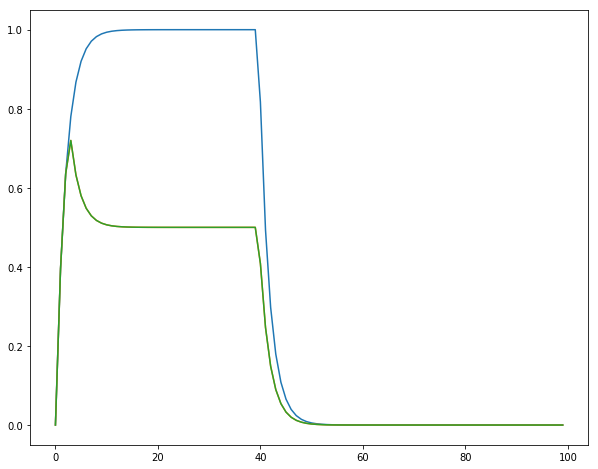

In [84]:
yt = ffl[:,0]
zt = ffl[:,1]
plt.figure(figsize=(10,8))
plt.plot(yt)
plt.plot(zt)
plt.plot(zt)